**Drake Meets World: Sowmya Murali**
======
***

### * <font color='#A5A5A5'>Exploring Drake's growth through analysis of his lyrics</font> *

***
<font color='#595959'>
### Table of Contents
#### Part 1: Scrape Lyrics (Separate Notebook)
#### Part 2: Create Metrics
    1 Sentiment Score
    2 Lexical Complexity
#### Part 3: Create Visualizations for Metrics
    1 Sentiment Score for Songs
    2 Lexical Complexity for Songs
    3 Sentiment Score & Lexical Complexity by Year
    4 Sentiment Score by Lexical Complexity
#### Part 4: Topic Analysis of Lyrics using NMF Model
#### Part 5: Word Cloud of Lyrics
#### Part 6: KMeans Clustering of Lyrics
#### Part 7: Ward Clustering of Lyrics
#### Part 8: Next Steps
***

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import string
import nltk
import codecs
import mpld3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import os
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import ward, dendrogram
from __future__ import print_function
from sklearn.manifold import MDS
from unidecode import unidecode
from textblob import Word,TextBlob
from collections import Counter
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import feature_extraction
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from nltk.stem.snowball import SnowballStemmer
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import figure
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Part 1: Scrape Lyrics (Please Refer to Separate Notebook)
***

## Part 2: Create Metrics
***

### Read csv of Lyrics

In [2]:
songs = pd.read_csv('/Users/sowmyamurali/Documents/DataViz/drakedata_NEW.csv')

In [3]:
df_songMetrics = songs.copy()

### Create sentiment score for lyrics

#### * <font color='gray'>Sentiment Score is how positive or negative the lyrics are. The score can be negative; however, for visualizations that have averages, the numbers are positive</font> *

In [4]:
#sentiment score
df_songMetrics[['polarity', 'subjectivity']] = df_songMetrics['lyrics'].apply(lambda x: pd.Series(TextBlob(x).sentiment))
df_songMetrics['sentiment'] = df_songMetrics['lyrics'].apply(lambda x: TextBlob(x).sentiment[0] )

### Calculate lexical complexity for lyrics

#### * <font color='gray'>I defined lexical complexity by the number of unique words out of total words</font> *

In [5]:
#complexity of songs
df_songMetrics['lyrics'] = df_songMetrics['lyrics'].astype(str)
df_songMetrics['lyrics'] = df_songMetrics['lyrics'].str.lower()

#total count of words
df_songMetrics['word_counts'] = np.nan
df_songMetrics.loc[[not row for row in np.isnan(df_songMetrics.sentiment)],'word_counts'] =\
df_songMetrics.loc[[not row for row in np.isnan(df_songMetrics.sentiment)],'lyrics'].apply(lambda x : len(x.split()))

#unique count of words
df_songMetrics['unique_word_counts'] = np.nan
df_songMetrics.loc[[not row for row in np.isnan(df_songMetrics.sentiment)],'unique_word_counts'] =\
df_songMetrics.loc[[not row for row in np.isnan(df_songMetrics.sentiment)],'lyrics'].apply(lambda x : len(set(x.split())))

#lexical complexity
df_songMetrics['lexical_complexity'] = df_songMetrics['unique_word_counts']/df_songMetrics['word_counts']

## Part 3: Create Visualizations for Metrics
***

### Plot Sentiment Scores for Songs

In [19]:
trace1 = go.Scatter(
    x= df_songMetrics['song'],
    y= df_songMetrics['sentiment'],
    mode='markers',
    marker=dict(
        size=12,
        color = df_songMetrics['sentiment'], #set color equal to a variable
        colorscale='Portland'))
data = [trace1]

layout = go.Layout(
        width = 1000,
        height = 700,
        title = 'Sentiment Score for Songs',
        hovermode= 'closest',
        titlefont = dict(size=20),
         xaxis = dict(
            title = 'Song',
            titlefont = dict(size=16),
            showticklabels=False,
            showgrid=False),
         yaxis = dict(
            title = 'Sentiment Score',
            titlefont = dict(size=16),
            autorange = True,
            showgrid = True,
            zeroline = True,
            dtick = 0.1,
            gridcolor = '#BBC7A4',
            gridwidth = 1,
            zerolinecolor = '#BBC7A4',
            zerolinewidth = 3),
        margin = dict(
            l = 70,
            r = 30,
            b = 180,
            t = 100),
        showlegend=False)

fig = dict(data=data,layout=layout)
iplot(fig, filename='sentiment')

#### Insights
+ Not surprising a majority of Drake's songs are relatively neutral or positive.
+ One song I was surprised by was "Know Yourself" which got a sentiment score of -0.16 but when I went back and read the lyrics I realized "woe" was the most used word and could have contributed to the lower sentiment score.
+ Currently a very popular song, "Nice for What" got a sentiment score of 0.03 although the lyrics aren't overly positive, it does have an overall positive message which explains the somewhat neutral sentiment score.

### Plot Lexical Complexity for Songs

In [20]:
trace1 = go.Scatter(
    x= df_songMetrics['song'],
    y= df_songMetrics['lexical_complexity'],
    mode='markers',
    marker=dict(
        size=12,
        color = df_songMetrics['lexical_complexity'], #set color equal to a variable
        colorscale='Portland'))
data = [trace1]

layout = go.Layout(
        width = 1000,
        height = 700,
        title = 'Lexical Complexity for Songs',
        hovermode= 'closest',
        titlefont = dict(size=20),
         xaxis = dict(
            title = 'Song',
            titlefont = dict(size=16),
            showticklabels=False,
            showgrid=False),
         yaxis = dict(
            title = 'Lexical Complexity',
            titlefont = dict(size=16),
            autorange = True,
            showgrid = True,
            zeroline = True,
            dtick = 0.1,
            gridcolor = '#BBC7A4',
            gridwidth = 1,
            zerolinecolor = '#BBC7A4',
            zerolinewidth = 3),
        margin = dict(
            l = 70,
            r = 30,
            b = 180,
            t = 100),
        showlegend=False)

fig = dict(data=data,layout=layout)
iplot(fig, filename='complexity')

#### Insights
+ The majority of Drake's songs are around 0.5 or under for lexical complexity. Considering the hook is repeated 3-4 times in each song, the overall low level of complexity is understandable.
+ The song with the highest lexical complexity is "Intro" from Comeback Season; however, this intro is only 3 lines so it doesn't really have the same count of words as the other songs which is an average of 503 words.
+ My favorite songs seem to be in the 0.3-0.4 complexity range not far from the average lexical complexity for his songs at 0.40.

### Average by Year

In [21]:
df_avg = df_songMetrics.groupby(['year']).mean().round(2)
df_avg['year'] = df_avg.index
df_avg = df_avg.replace('â','', regex=True)

### Plot Sentiment Scores and Lexical Complexity by Year

In [23]:
trace0 = go.Scatter(
    x = df_avg['year'],
    y = df_avg['sentiment'],
    name = 'Sentiment',
    line = dict(
        color = ('#DA5552'),
        width = 4)
)
trace1 = go.Scatter(
    x = df_avg['year'],
    y = df_avg['lexical_complexity'],
    name = 'Lexical Complexity',
    yaxis='y2',
    line = dict(
        color = ('#06D6A0'),
        width = 4)
)
data = [trace0,trace1]
layout = go.Layout(
        title = 'Average Sentiment Score & Lexical Complexity by Year',
        titlefont = dict(size=20),
        xaxis = dict(
            title = 'Year',
            titlefont = dict(size=16),
            dtick = 1),    
        yaxis = dict(
            title = 'Sentiment Score',
            titlefont = dict(size=16,color='#DA5552'),
            autorange = True,
            showgrid = True,
            zeroline = True,
            gridcolor = '#BBC7A4',
            gridwidth = 1,
            zerolinecolor = '#BBC7A4',
            zerolinewidth = 3),
        yaxis2=dict(
        title='Lexical Complexity',
        titlefont=dict(size=16,
            color='#06D6A0'
        ),
        overlaying='y',
        side='right'
    ),
        margin = dict(
            l = 80,
            r = 100,
            b = 80,
            t = 100),
        showlegend=False)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter-plot-with-colorscale')

#### Insights
+ The sentiment and lexical complexity of Drake's songs seem to move in the same direction through out the years.
+ 2015 had the lowest sentiment score and happens to coincide with the year he released a collaborative mixtape with Future, "What A Time to Be Alive" which focused on dealing with personal demons and insecurities.
+ 2017-2018 had the highest lexical complexity at an average of 0.43. 2017 was the year he released "More Life" an album sprinkled with Jamaican slang (potentially contributing to the higher lexical diversity) and in 2018 he released Scorpion, an album of 25 songs.

### Plot Sentiment Scores against Lexical Complexity

In [34]:
trace = go.Scatter(
    x = df_songMetrics['sentiment'],
    y = df_songMetrics['lexical_complexity'],
    mode = 'markers',
    marker = dict(
        size = 12,
        color = '#77E8CB',
        line = dict(
            width = 2,
            color = '#06C392'
        )
    ),
    text= df_songMetrics['song']
)

data = [trace]

layout = go.Layout(
        width = 800,
        height = 700,
        title = 'Sentiment Score by Lexical Complexity',
        hovermode= 'closest',
        titlefont = dict(size=20),
        xaxis = dict(
            title = 'Sentiment Score',
            titlefont = dict(size=16)),    
        yaxis = dict(
            title = 'Lexical Complexity',
            titlefont = dict(size=16),
            autorange = True,
            showgrid = True,
            zeroline = True,
            dtick = 0.2,
            gridcolor = '#BBC7A4',
            gridwidth = 1,
            zerolinecolor = '#BBC7A4',
            zerolinewidth = 3),
        margin = dict(
            l = 80,
            r = 30,
            b = 80,
            t = 100),
        showlegend=False)

fig = dict(data=data,layout=layout)
iplot(fig, filename='basic-scatter')

#### Insights
+ I was hoping to see a relationship between lexical complexity and sentiment but it looks like they cluster around the center.
+ The song with the lowest sentiment score, "Mob Ties" was also on the lower end for lexical complexity at 0.33, even less than the average.
+ However, the song with the highest sentiment score, "Best I Ever Had" also happened to be on the lower end for lexical complexity at 0.29 revealing even simpler songs can be compelling and unforgettable.

## Part 4: Topic Analysis of Lyrics
***

### Save copy of lyrics for topic analysis

In [35]:
df_topics = songs.copy()

### Create list of the lyrics

In [36]:
lyrics=df_topics['lyrics'].tolist()

### Lemmatize & remove punctuation in the lyrics

#### * <font color='gray'>Lemmatization converts the word into its root word</font> *

In [37]:
lemmatization = lambda x: " ".join([Word(word).lemmatize() for word in x.split()])
lyrics = list(map(lemmatization, lyrics))

#remove punctuation
lyrics = [w.replace('[^\w\s]', '') for w in lyrics]

### Create function to display topics

####  *<font color='gray'>Topics are a repeating pattern of co-occurring terms in a corpus</font> *

In [38]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['ugh','em','ohhh','aha','ll','oho','ck','ve','ooooooh','hooooooo','mothafuckas','mothafucka','woah','aye','skrrt','hey','huh','wa','hoo','ayy','yuh','ay','ain','ya','ooh','yeah','like','just','know','want','need','got','make','wanna','gonna','gotta','gon','don','oh','tryna','told','this','maybe','cause','nigga','niggas','used'])

def display_topics(H, W, feature_names, documents, no_top_words):
    for topic_idx, topic in enumerate(H):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

documents = lyrics
no_topics = 10
no_top_words = 10
no_features = 1000
no_top_documents = 2

###  Use tf-idf for the NMF Model

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=my_stop_words)
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

### Run NMF Model

In [40]:
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

### Display the topics

In [41]:
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words)

Topic 0:
shit love time girl man feel way say thing good
Topic 1:
going girl right babe emotion open story usual lover choose
Topic 2:
safe promise mercy fall downtown asleep address false traffic birthday
Topic 3:
mind somethin yellin rise time money decide catch guy chance
Topic 4:
lonely face ring anybody place really rule baby mix tell
Topic 5:
care hurt loved lie carry lost won ashamed tell thinking
Topic 6:
look worked hurt love wasn kid bounce stressed bank deserve
Topic 7:
light sun caught party target celebrate wait toast winter dumb
Topic 8:
kissed afford shoulder dont weight right closer emotion secret open
Topic 9:
drop working practicing 504 girls practice won right daddy stop


#### Insights
+ Drake has a reputation of being emotional and the topic analysis supports that.
+ Most of these topics are emotional with words like "love", "hurt" and "lonely" and generally have the word "girl" or another word for girl (i.e. baby).
+ The most positive topic is Topic 7, with "celebrate" and "party".
+ Overall, I think Drake just wants to talk about his feelings and maybe that's why I like him so much.

## Part 5: Word Cloud of Lyrics
***

### Word cloud with mask

In [42]:
text = " ".join(documents)
stopwords = my_stop_words
mask = np.array(Image.open('/Users/sowmyamurali/Documents/DataViz/drake.jpg'))
wc = WordCloud(background_color="white", max_words=300, mask=mask,
               stopwords=stopwords,max_font_size=90, random_state=42)

### Display and save wordcloud to file

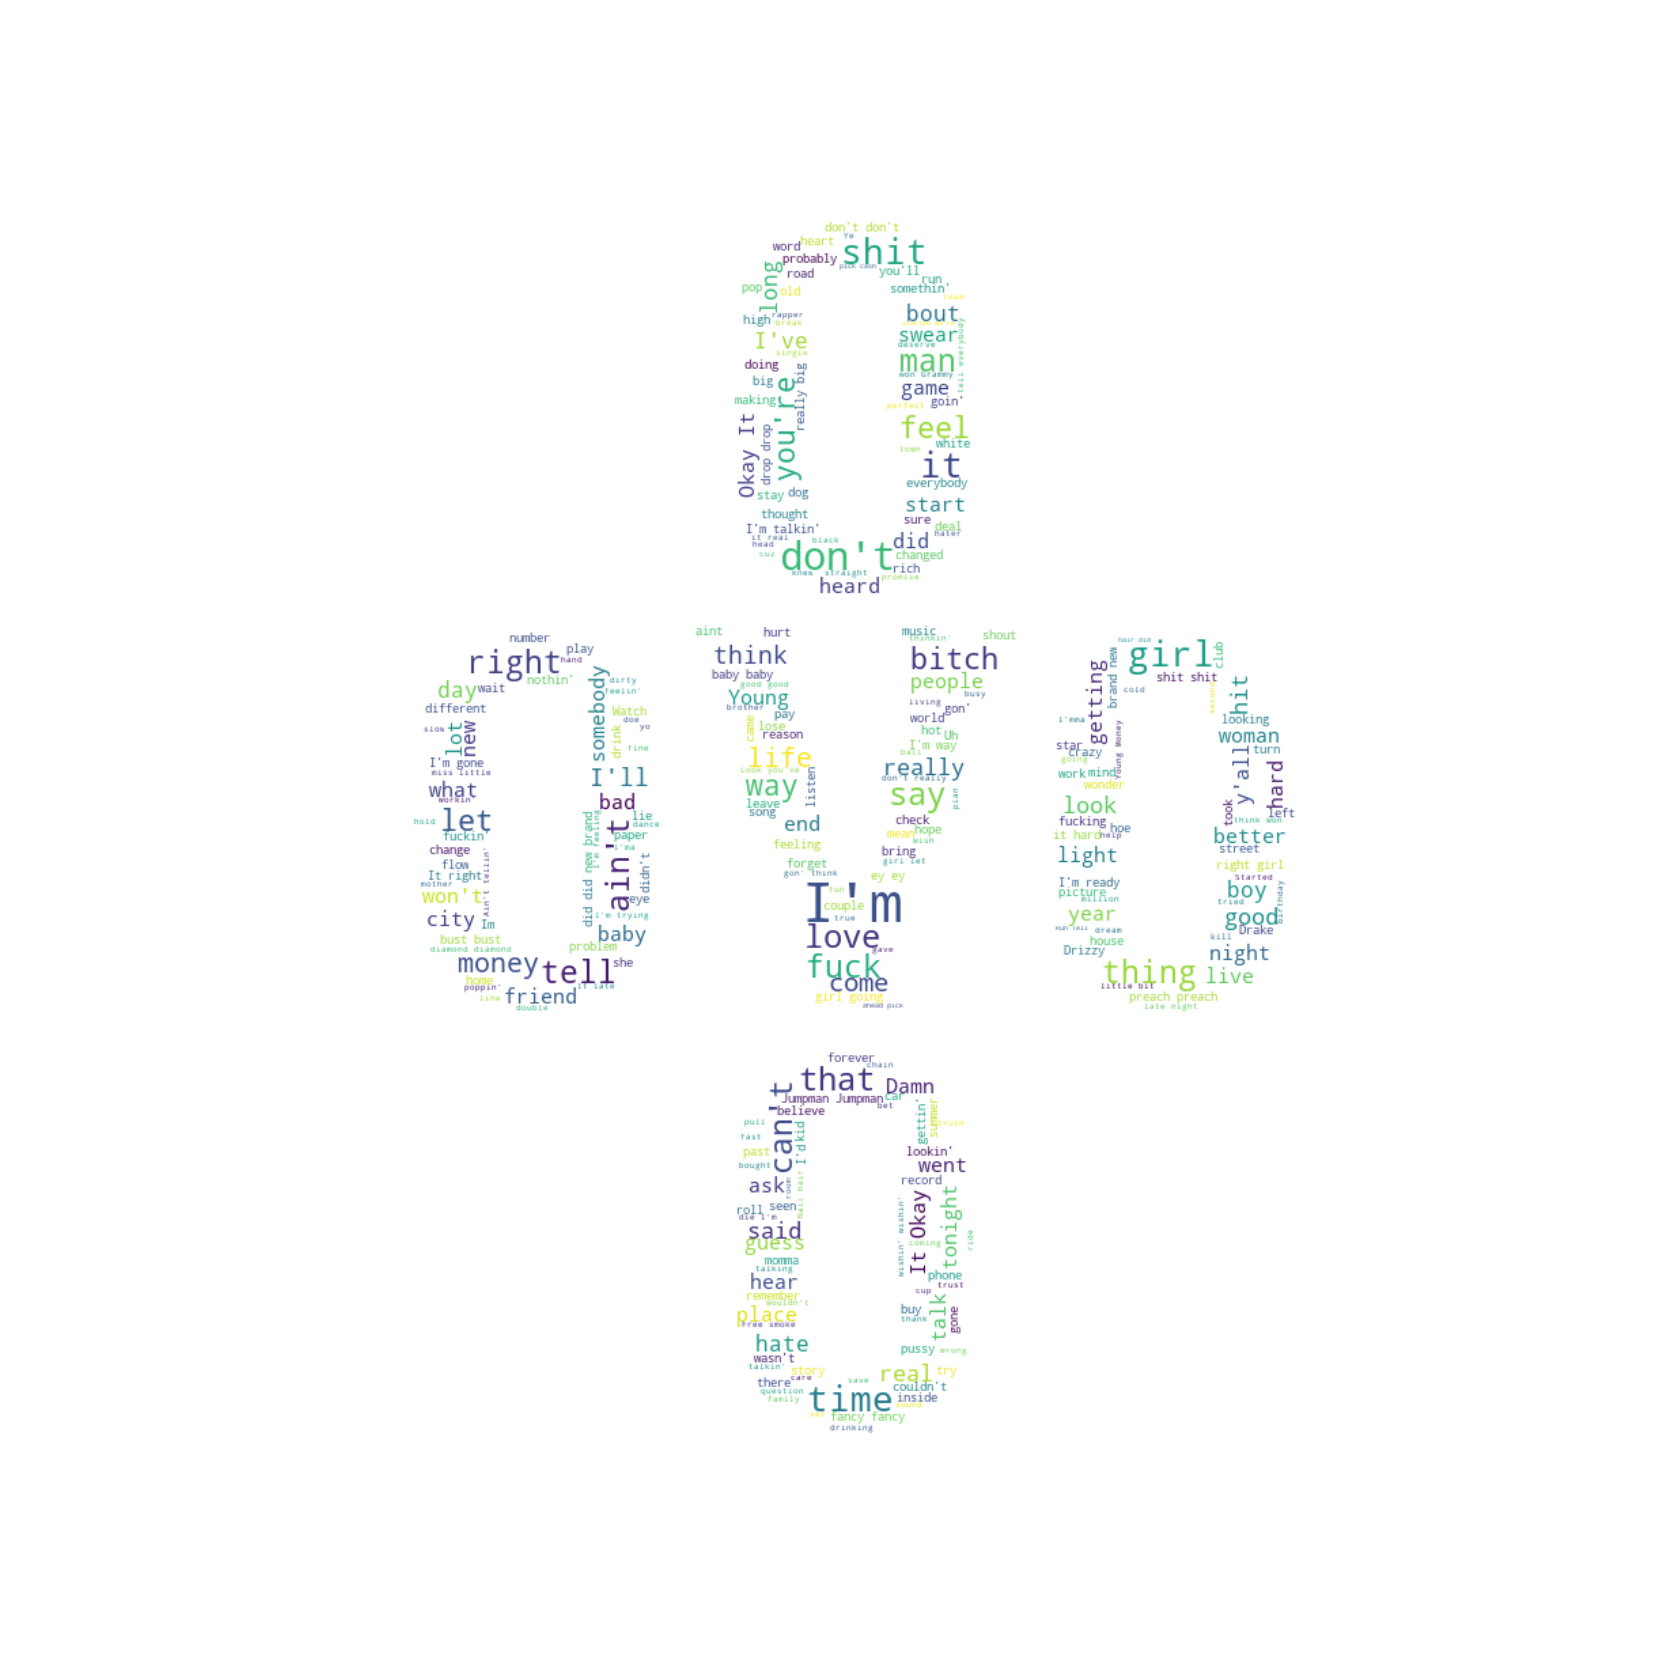

In [43]:
wc.generate(text)
plt.figure(figsize=(30,30))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
wc.to_file('/Users/sowmyamurali/Documents/DataViz/wordcloud.png')
plt.show()

#### Insights
+ Based on the prominent "I'm", I get the sense while I love Drake a lot, Drake loves Drake even more.
+ Combined with the topic analysis, the most common theme is girls! Whether it's singing about girls or singing to them.

## Part 6: KMeans Clustering of Lyrics
***

### Save Lists of Fields I Need

In [44]:
clusters = songs.copy()
songs = clusters['song'].tolist()
lyrics = clusters['lyrics'].tolist()
albums = clusters['album'].tolist()

### Stem and Tokenize the Words

####  *<font color='gray'>Stemming breaks a word down into its root similar to lemmatizing. Tokenizing splits the lyrics into a list its words.</font> *

In [45]:
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [46]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in lyrics:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

###  Use tf-idf for the KMeans Model

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words=my_stop_words,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics)
terms = tfidf_vectorizer.get_feature_names()

###  Get a Measure of Similarity Between Songs

In [48]:
dist = 1 - cosine_similarity(tfidf_matrix)

### Run KMeans Model

In [49]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

### Create Dataframe of Songs with Assigned Clusters

In [50]:
df_songs = {'song': songs,'album': albums, 'lyrics': lyrics, 'cluster': clusters}

df_clusters = pd.DataFrame(df_songs, index = [clusters] , columns = ['song', 'cluster'])

### Create Dataframe of Tokenized Lyrics

In [51]:
df_vocab = pd.DataFrame({'lyrics': totalvocab_tokenized}, index = totalvocab_stemmed)

### Top Ten Words Per Cluster

In [52]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()

for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: shit
 ca n't
 ca
 way
 ai n't
 ai
 onli
 love
 say
 someon
Cluster 1: let
 feel
 thing
 man
 way
 good
 realli
 life
 shit
 girl
Cluster 2: time
 wan
 wan na
 na
 say
 caus
 mind
 shit
 love
 tri
Cluster 3: love
 money
 bitch
 shit
 ai n't
 ai
 talk
 fuck
 miss
 caus
Cluster 4: girl
 right
 tell
 night
 work
 wo n't
 wo
 someth
 bout
 let


### Convert Into a 2-dimensional Array for Visualizing

In [53]:
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist) 
xs, ys = pos[:, 0], pos[:, 1]

### Visualize Clusters

In [56]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=songs)) 
df.loc[df['label']==0,'color'] = '#A63446'
df.loc[df['label']==1,'color'] = '#5FAD56'
df.loc[df['label']==2,'color'] = '#0C6291'
df.loc[df['label']==3,'color'] = '#F2C14E'
df.loc[df['label']==4,'color'] = '#F78154'
groups0 = df.loc[df['label']==0]
groups1 = df.loc[df['label']==1]
groups2 = df.loc[df['label']==2]
groups3 = df.loc[df['label']==3]
groups4 = df.loc[df['label']==4]

cluster0 = go.Scatter(
    x = groups0.x,
    y = groups0.y,
    mode = 'markers',
    marker = dict(
        size = 14,
        color = groups0['color'],
        line = dict(
            width = 2,
            color = groups0['color']
        )
    ),
    text= groups0['title'],
    name='Cluster 1'
)

cluster1 = go.Scatter(
    x = groups1.x,
    y = groups1.y,
    mode = 'markers',
    marker = dict(
        size = 14,
        color = groups1['color'],
        line = dict(
            width = 2,
            color = groups1['color']
        )
    ),
    text= groups1['title'],
    name='Cluster 2'
)
cluster2 = go.Scatter(
    x = groups2.x,
    y = groups2.y,
    mode = 'markers',
    marker = dict(
        size = 14,
        color = groups2['color'],
        line = dict(
            width = 2,
            color = groups2['color']
        )
    ),
    text= groups2['title'],
    name='Cluster 3'
)
cluster3 = go.Scatter(
    x = groups3.x,
    y = groups3.y,
    mode = 'markers',
    marker = dict(
        size = 14,
        color = groups3['color'],
        line = dict(
            width = 2,
            color = groups3['color']
        )
    ),
    text= groups3['title'],
    name='Cluster 4'
)
cluster4 = go.Scatter(
    x = groups4.x,
    y = groups4.y,
    mode = 'markers',
    marker = dict(
        size = 14,
        color = groups4['color'],
        line = dict(
            width = 2,
            color = groups4['color']
        )
    ),
    text= groups4['title'],
    name='Cluster 5'
)
data = [cluster0,cluster1,cluster2,cluster3,cluster4]

layout = go.Layout(
         width = 1000,
        height = 700,
        title = 'Song Clusters',
        hovermode= 'closest',
        titlefont = dict(size=22),
        xaxis = dict(
            titlefont = dict(size=16),
            showgrid = False,
            showticklabels = False,
            zeroline = False),    
        yaxis = dict(
            titlefont = dict(size=16),
            autorange = True,
            showgrid = False,
            showticklabels = False,
            zeroline = False,
            gridcolor = '#BBC7A4',
            gridwidth = 1,
            zerolinecolor = '#BBC7A4',
            zerolinewidth = 3),
        margin = dict(
            l = 80,
            r = 30,
            b = 80,
            t = 100),
        showlegend=True)

fig = dict(data=data,layout=layout)
iplot(fig, filename='basic-scatter')

#### Insights
+ Cluster 5 is the most distinct at the top but also the cluster with the fewest values.
+ I can't say from my personal knowledge what is the common theme in the clusters. For me, it was easier to draw insights from the topic analysis.

## Part 7: Ward Clustering of Lyrics
***

####  *<font color='gray'>At each stage, pairs of clusters with minimum distance are merged into one cluster. There are 3 main clusters with the largest cluster split into 4 major subclusters.</font> *

In [55]:
linkage_matrix = ward(dist)
dendro = ff.create_dendrogram(linkage_matrix, orientation='left', labels=songs)
dendro['layout'].update({'title': 'Dendrogram of Lyrics'})
dendro['layout']['xaxis'].update({'showgrid': False,
                                  'showline': True,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks':""})
dendro['layout']['yaxis'].update({'ticks': ""})
dendro['layout'].margin.update({'l':180,'r':30,'b':30,'t':40,'pad':4})
dendro['layout'].update({'width':900, 'height':2500})
iplot(dendro, filename='simple_dendrogram')

#### Insights
+ Drake's more popular songs are, for the majority, in the light blue cluster (this also happens to be the largest).
+ I listened to "Hotline Bling" and "Club Paradise" to see how similar they were. They do in fact have similar themes, his previous lovers moving on, living their lives without him.
+ I prefer this cluster analysis compared to KMeans as it has been more insightful for me 

***
<font color='#595959'>
## Part 8: Next Steps
    1 Look at sentiment score & lexical complexity by featured artist and by performance in charts
    2 Topic analysis by album
    3 Visualize cities Drake has sang about (including related sentiment scores for the songs)
    4 Visualize profits for albums/songs by artist featured
***